In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

# Setting Data Up

In [3]:
regression_data = pd.read_csv("../output_data/seth/rule_level_data.csv")
regression_data['unchanged'] = np.where(regression_data.name_change_type == 'unchanged', 1, 0)
regression_data['deleted'] = np.where(regression_data.name_change_type == 'deleted', 1, 0)
regression_data['changed'] = np.where(regression_data.name_change_type == 'changed', 1, 0)
regression_data['rule_age_in_years'] = regression_data.rule_age_in_days / 365
regression_data

,name_change_type,description_change_type,violation_change_type,date_observed,timestamp_rule,communityID,ref,ruleID,rule_age_in_days,unchanged,deleted,changed,rule_age_in_years
0,unchanged,unchanged,never_present,2021-04-23 00:00:00,2020-08-01,weeklydiscoveries,https://www.reddit.com/r/weeklydiscoveries/,weeklydiscoveries_0,265,1,0,0,0.726027
1,unchanged,unchanged,never_present,2021-04-23 00:00:00,2020-08-01,weeklydiscoveries,https://www.reddit.com/r/weeklydiscoveries/,weeklydiscoveries_1,265,1,0,0,0.726027
2,unchanged,unchanged,never_present,2021-04-23 00:00:00,2020-08-01,weeklydiscoveries,https://www.reddit.com/r/weeklydiscoveries/,weeklydiscoveries_2,265,1,0,0,0.726027
3,unchanged,unchanged,never_present,2021-04-23 00:00:00,2020-08-01,weeklydiscoveries,https://www.reddit.com/r/weeklydiscoveries/,weeklydiscoveries_3,265,1,0,0,0.726027
4,unchanged,unchanged,unchanged,2021-04-23 00:00:00,2017-05-01,elbowsafespace,https://www.reddit.com/r/elbowsafespace/,elbowsafespace_0,1453,1,0,0,3.980822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525013,unchanged,unchanged,never_present,2021-04-23 00:00:00,2018-04-01,acrl,https://www.reddit.com/r/acrl/,acrl_0,1118,1,0,0,3.063014
525014,unchanged,unchanged,never_present,2021-04-23 00:00:00,2018-04-01,acrl,https://www.reddit.com/r/acrl/,acrl_1,1118,1,0,0,3.063014
525015,unchanged,unchanged,never_present,2021-04-23 00:00:00,2018-04-01,acrl,https://www.reddit.com/r/acrl/,acrl_2,1118,1,0,0,3.063014
525016,unchanged,unchanged,never_present,2021-04-23 00:00:00,2018-04-01,acrl,https://www.reddit.com/r/acrl/,acrl_3,1118,1,0,0,3.063014


# Regression

accuracy: 0.9818165657181314
precision: 0.0
recall: 0.0
f1: 0.0


C:\Users\nammy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


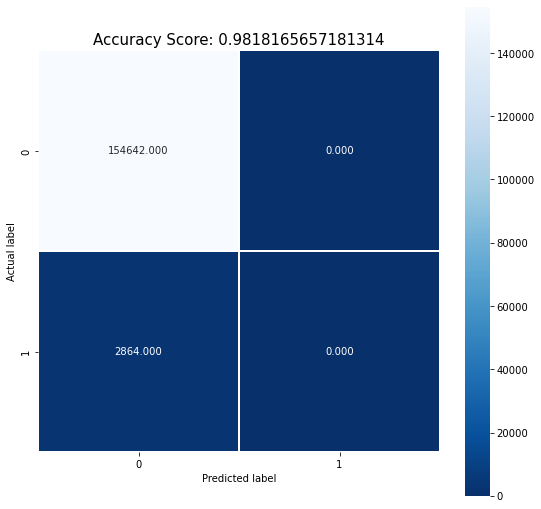

In [5]:
X = regression_data[['c']].values.astype(np.ndarray)
y = np.array(regression_data.deleted)

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# logistic regression
reg = LogisticRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
score = reg.score(X_test, y_test)
print(f'accuracy: {score}')
print(f'precision: {metrics.precision_score(y_test, predictions)}')
print(f'recall: {metrics.recall_score(y_test, predictions)}')
print(f'f1: {metrics.f1_score(y_test, predictions)}')

# print confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Regression Comparisons

In [6]:
deleted = logit('deleted ~ rule_age_in_years', data=regression_data).fit()
print(deleted.summary())

Optimization terminated successfully.
         Current function value: 0.090673
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                deleted   No. Observations:               525018
Model:                          Logit   Df Residuals:                   525016
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 May 2023   Pseudo R-squ.:                0.003248
Time:                        13:36:34   Log-Likelihood:                -47605.
converged:                       True   LL-Null:                       -47760.
Covariance Type:            nonrobust   LLR p-value:                 1.926e-69
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.7687      0.016   -238.159      0.000      -3.800      -3.738
rule_age

In [8]:
unchanged = logit('unchanged ~ rule_age_in_years', data=regression_data).fit()
print(unchanged.summary())

Optimization terminated successfully.
         Current function value: 0.198549
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              unchanged   No. Observations:               525018
Model:                          Logit   Df Residuals:                   525016
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 May 2023   Pseudo R-squ.:                 0.01881
Time:                        13:37:13   Log-Likelihood:            -1.0424e+05
converged:                       True   LL-Null:                   -1.0624e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.4353      0.010    256.138      0.000       2.417       2.454
rule_age

In [9]:
changed = logit('changed ~ rule_age_in_years', data=regression_data).fit()
print(changed.summary())

Optimization terminated successfully.
         Current function value: 0.009856
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                changed   No. Observations:               525018
Model:                          Logit   Df Residuals:                   525016
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 May 2023   Pseudo R-squ.:               1.115e-06
Time:                        13:37:22   Log-Likelihood:                -5174.3
converged:                       True   LL-Null:                       -5174.3
Covariance Type:            nonrobust   LLR p-value:                    0.9145
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.6587      0.060   -110.474      0.000      -6.777      -6.541
rule_ag